In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import statsmodels.api as sm

In [5]:
# Load data
final_df = pd.read_csv('data/aggregated_data.csv')
final_df.head()

,Unnamed: 0,year_month,launched,share_with_ukraine,a3_share_with_ukraine,la6_share_with_ukraine,t5_share_with_ukraine,fatalities,a3_share_class_1,la6_share_class_1,t5_share_class_1,total_share_class_1
0,0,2022-12-01,364.0,0.068872,0.091422,0.059908,0.058140,2174,0.172467,0.212945,0.198678,0.196723
1,1,2023-01-01,213.0,0.102060,0.147257,0.079872,0.079861,1187,0.255780,0.321944,0.318334,0.306667
2,2,2023-02-01,193.0,0.141184,0.195722,0.100925,0.137572,665,0.220494,0.215436,0.204096,0.211006
3,3,2023-03-01,181.0,0.090881,0.111977,0.076399,0.088000,866,0.265193,0.256988,0.292427,0.272245
4,4,2023-04-01,117.0,0.072224,0.091097,0.061329,0.065614,1135,0.221421,0.236270,0.283354,0.250800


## Correlation analysis

                        launched  fatalities  a3_share_with_ukraine  \
launched                1.000000   -0.255204              -0.417609   
fatalities             -0.255204    1.000000               0.239518   
a3_share_with_ukraine  -0.417609    0.239518               1.000000   
la6_share_with_ukraine -0.534884    0.215755               0.904131   
t5_share_with_ukraine  -0.441791    0.147237               0.934709   
a3_share_class_1       -0.563479    0.160001               0.503373   
la6_share_class_1      -0.403907    0.220396               0.374757   
t5_share_class_1       -0.528946    0.172214               0.233042   

                        la6_share_with_ukraine  t5_share_with_ukraine  \
launched                             -0.534884              -0.441791   
fatalities                            0.215755               0.147237   
a3_share_with_ukraine                 0.904131               0.934709   
la6_share_with_ukraine                1.000000               0.87648

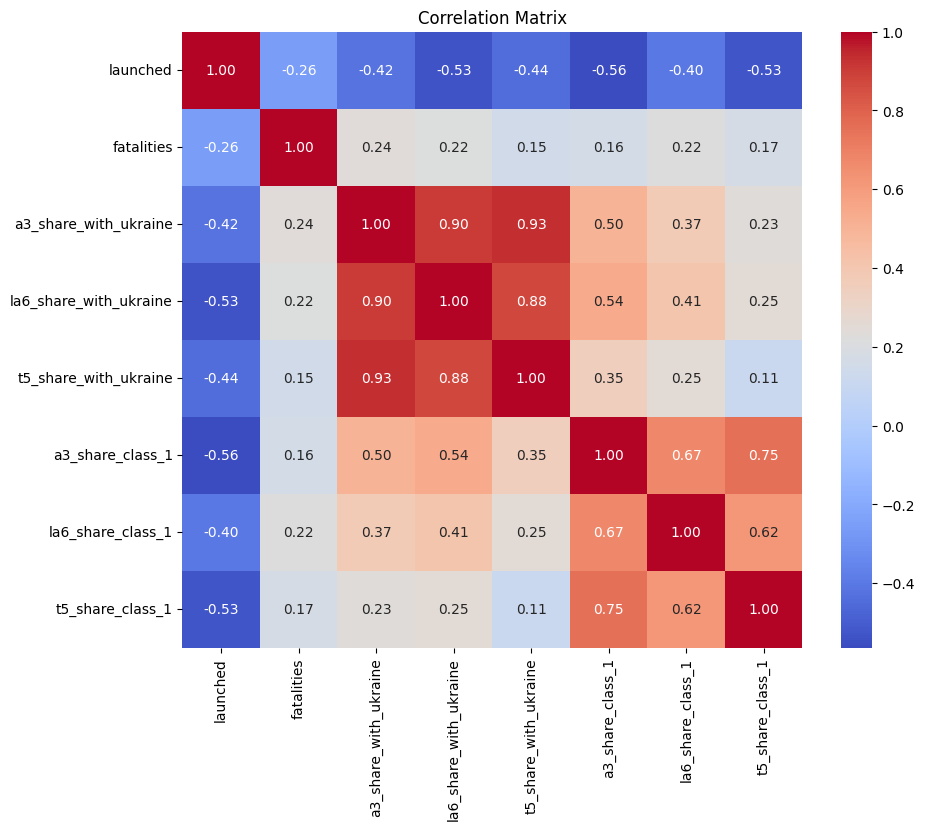

In [9]:
# Correlation matrix of all trends
df_corr = final_df[['launched', 'fatalities', 'a3_share_with_ukraine', 'la6_share_with_ukraine', 't5_share_with_ukraine', 'a3_share_class_1', 'la6_share_class_1', 't5_share_class_1']]

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Regression Analysis

Cross channel analysis

In [11]:
# A3 independent
Y = final_df['a3_share_class_1']
X = final_df[['la6_share_class_1', 't5_share_class_1']]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       a3_share_class_1   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     12.40
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           0.000795
Time:                        22:11:59   Log-Likelihood:                 37.615
No. Observations:                  17   AIC:                            -69.23
Df Residuals:                      14   BIC:                            -66.73
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0354      0.03

c:\Users\gatla\anaconda3\envs\pytorch_image\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [12]:
# LA6 independent
Y = final_df['la6_share_class_1']
X = final_df[['a3_share_class_1', 't5_share_class_1']]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      la6_share_class_1   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     6.551
Date:                Thu, 20 Jun 2024   Prob (F-statistic):            0.00981
Time:                        22:14:42   Log-Likelihood:                 28.152
No. Observations:                  17   AIC:                            -50.30
Df Residuals:                      14   BIC:                            -47.80
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0061      0.059  

c:\Users\gatla\anaconda3\envs\pytorch_image\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [13]:
# T5 independent
Y = final_df['t5_share_class_1']
X = final_df[['la6_share_class_1', 'a3_share_class_1']]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       t5_share_class_1   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     10.15
Date:                Thu, 20 Jun 2024   Prob (F-statistic):            0.00189
Time:                        22:14:44   Log-Likelihood:                 34.132
No. Observations:                  17   AIC:                            -62.26
Df Residuals:                      14   BIC:                            -59.76
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0592      0.03

c:\Users\gatla\anaconda3\envs\pytorch_image\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


Channels with real events

DO THESE SEPERATELY

PANEL REGRESSION CLUSTERED ON TIME

In [14]:
# A3
Y = final_df['a3_share_class_1']
X = final_df[['launched', 'fatalities']]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       a3_share_class_1   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     3.261
Date:                Thu, 20 Jun 2024   Prob (F-statistic):             0.0688
Time:                        22:17:35   Log-Likelihood:                 32.200
No. Observations:                  17   AIC:                            -58.40
Df Residuals:                      14   BIC:                            -55.90
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2377      0.038      6.223      0.0

c:\Users\gatla\anaconda3\envs\pytorch_image\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [15]:
# LA6
Y = final_df['la6_share_class_1']
X = final_df[['launched', 'fatalities']]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      la6_share_class_1   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     1.514
Date:                Thu, 20 Jun 2024   Prob (F-statistic):              0.254
Time:                        22:17:49   Log-Likelihood:                 24.201
No. Observations:                  17   AIC:                            -42.40
Df Residuals:                      14   BIC:                            -39.90
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2286      0.061      3.738      0.0

c:\Users\gatla\anaconda3\envs\pytorch_image\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [16]:
# T5
Y = final_df['t5_share_class_1']
X = final_df[['launched', 'fatalities']]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       t5_share_class_1   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     2.739
Date:                Thu, 20 Jun 2024   Prob (F-statistic):             0.0991
Time:                        22:18:07   Log-Likelihood:                 29.322
No. Observations:                  17   AIC:                            -52.64
Df Residuals:                      14   BIC:                            -50.14
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2754      0.045      6.087      0.0

c:\Users\gatla\anaconda3\envs\pytorch_image\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


## Everything below is old

QUESTION: To we also need to do this grouping on a weekly level?

QUESTION: Why reg and not correlation coef? How should we acutally interpret the reg?

Adding regressions to check for correlations between trends of interest

In [ ]:
import statsmodels.api as sm
final_df.head()

,year_month,launched,share_with_ukraine,a3_share_with_ukraine,la6_share_with_ukraine,t5_share_with_ukraine,fatalities,a3_share_class_1,la6_share_class_1,t5_share_class_1,total_share_class_1
0,2022-12-01,364.0,0.068872,0.091422,0.059908,0.058140,2174,0.172467,0.212945,0.198678,0.196723
1,2023-01-01,213.0,0.102060,0.147257,0.079872,0.079861,1187,0.255780,0.321944,0.318334,0.306667
2,2023-02-01,193.0,0.141184,0.195722,0.100925,0.137572,665,0.220494,0.215436,0.204096,0.211006
3,2023-03-01,181.0,0.090881,0.111977,0.076399,0.088000,866,0.265193,0.256988,0.292427,0.272245
4,2023-04-01,117.0,0.072224,0.091097,0.061329,0.065614,1135,0.221421,0.236270,0.283354,0.250800


QUESTION: Should we add correlation of coverage across channels?

Correlation of war images across channels

In [ ]:
# A3 on LA6
Y = final_df['a3_share_class_1']
X = final_df['la6_share_class_1']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       a3_share_class_1   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     12.53
Date:                Wed, 19 Jun 2024   Prob (F-statistic):            0.00297
Time:                        14:27:57   Log-Likelihood:                 34.112
No. Observations:                  17   AIC:                            -64.22
Df Residuals:                      15   BIC:                            -62.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0958      0.02

c:\Users\gatla\anaconda3\envs\pytorch_image\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Calculate the correlation coefficient
X = final_df['la6_share_class_1']
correlation_matrix = np.corrcoef(X, Y)
correlation_coefficient = correlation_matrix[0, 1]

print(f"Correlation coefficient: {correlation_coefficient}")

Correlation coefficient: 0.6746902217868095


In [ ]:
# LA6 on A3
Y = final_df['la6_share_class_1']
X = final_df['a3_share_class_1']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      la6_share_class_1   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     12.53
Date:                Wed, 19 Jun 2024   Prob (F-statistic):            0.00297
Time:                        12:44:27   Log-Likelihood:                 27.699
No. Observations:                  17   AIC:                            -51.40
Df Residuals:                      15   BIC:                            -49.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0138      0.054  

c:\Users\gatla\anaconda3\envs\pytorch_image\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# A3 on T5
Y = final_df['a3_share_class_1']
X = final_df['t5_share_class_1']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       a3_share_class_1   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     19.85
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           0.000463
Time:                        12:42:07   Log-Likelihood:                 36.114
No. Observations:                  17   AIC:                            -68.23
Df Residuals:                      15   BIC:                            -66.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0406      0.034  

c:\Users\gatla\anaconda3\envs\pytorch_image\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# LA6 on T5
Y = final_df['la6_share_class_1']
X = final_df['t5_share_class_1']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      la6_share_class_1   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     9.339
Date:                Wed, 19 Jun 2024   Prob (F-statistic):            0.00801
Time:                        12:43:28   Log-Likelihood:                 26.651
No. Observations:                  17   AIC:                            -49.30
Df Residuals:                      15   BIC:                            -47.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0224      0.059  

c:\Users\gatla\anaconda3\envs\pytorch_image\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
final_df.head()

,year_month,launched,share_with_ukraine,a3_share_with_ukraine,la6_share_with_ukraine,t5_share_with_ukraine,fatalities,a3_share_class_1,la6_share_class_1,t5_share_class_1,total_share_class_1
0,2022-12-01,364.0,0.068872,0.091422,0.059908,0.058140,2174,0.172467,0.212945,0.198678,0.196723
1,2023-01-01,213.0,0.102060,0.147257,0.079872,0.079861,1187,0.255780,0.321944,0.318334,0.306667
2,2023-02-01,193.0,0.141184,0.195722,0.100925,0.137572,665,0.220494,0.215436,0.204096,0.211006
3,2023-03-01,181.0,0.090881,0.111977,0.076399,0.088000,866,0.265193,0.256988,0.292427,0.272245
4,2023-04-01,117.0,0.072224,0.091097,0.061329,0.065614,1135,0.221421,0.236270,0.283354,0.250800


Overall comparison with real data

In [ ]:
# Percentage of coverage on missiles launched
Y = final_df['share_with_ukraine']
X = final_df['launched']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     share_with_ukraine   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     4.446
Date:                Wed, 19 Jun 2024   Prob (F-statistic):             0.0522
Time:                        12:49:56   Log-Likelihood:                 37.168
No. Observations:                  17   AIC:                            -70.34
Df Residuals:                      15   BIC:                            -68.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0912      0.016      5.559      0.0

c:\Users\gatla\anaconda3\envs\pytorch_image\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Percentage of coverage on fatalities
Y = final_df['share_with_ukraine']
X = final_df['fatalities']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     share_with_ukraine   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.7164
Date:                Wed, 19 Jun 2024   Prob (F-statistic):              0.411
Time:                        12:50:51   Log-Likelihood:                 35.358
No. Observations:                  17   AIC:                            -66.72
Df Residuals:                      15   BIC:                            -65.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0434      0.021      2.056      0.0

c:\Users\gatla\anaconda3\envs\pytorch_image\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Percentage of war on missiles launched
Y = final_df['total_share_class_1']
X = final_df['launched']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     total_share_class_1   R-squared:                       0.300
Model:                             OLS   Adj. R-squared:                  0.254
Method:                  Least Squares   F-statistic:                     6.436
Date:                 Wed, 19 Jun 2024   Prob (F-statistic):             0.0228
Time:                         12:52:00   Log-Likelihood:                 29.728
No. Observations:                   17   AIC:                            -55.46
Df Residuals:                       15   BIC:                            -53.79
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2606      0.025     10.24

c:\Users\gatla\anaconda3\envs\pytorch_image\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Percentage of war on fatalities
Y = final_df['total_share_class_1']
X = final_df['fatalities']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     total_share_class_1   R-squared:                       0.052
Model:                             OLS   Adj. R-squared:                 -0.011
Method:                  Least Squares   F-statistic:                    0.8250
Date:                 Wed, 19 Jun 2024   Prob (F-statistic):              0.378
Time:                         14:26:43   Log-Likelihood:                 27.149
No. Observations:                   17   AIC:                            -50.30
Df Residuals:                       15   BIC:                            -48.63
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1734      0.034      5.07

c:\Users\gatla\anaconda3\envs\pytorch_image\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Calculate the correlation coefficient
X = final_df['fatalities']
correlation_matrix = np.corrcoef(X, Y)
correlation_coefficient = correlation_matrix[0, 1]

print(f"Correlation coefficient: {correlation_coefficient}")

Correlation coefficient: 0.22832522948927397


In [ ]:
# Combining testing
from statsmodels.iolib.summary2 import summary_col

# Fit the models
# Percentage of war on fatalities
Y = final_df['total_share_class_1']
X = final_df['fatalities']
X = sm.add_constant(X)

model1 = sm.OLS(Y, X).fit()

# Percentage of war on missiles launched
Y = final_df['total_share_class_1']
X = final_df['launched']
X = sm.add_constant(X)

model2 = sm.OLS(Y, X).fit()


# Combine summaries into one table
summary = summary_col([model1, model2], stars=True, float_format='%0.2f',
                      model_names=['Fatalities', 'Launched'],
                      info_dict={'R-squared': lambda x: f"{x.rsquared:.2f}",
                                 'No. observations': lambda x: f"{int(x.nobs)}"})

print(summary)


                 Fatalities Launched
------------------------------------
const            0.17***    0.26*** 
                 (0.03)     (0.03)  
fatalities       0.00               
                 (0.00)             
launched                    -0.00** 
                            (0.00)  
R-squared        0.05       0.30    
R-squared Adj.   -0.01      0.25    
No. observations 17         17      
R-squared        0.05       0.30    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
